In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use("ggplot")
sns.set_context("talk")

In [4]:
def load_mss_results():
    msses = [
        "0.00", "0.01", "0.02", "0.03", "0.04",
        "0.05", "0.06", "0.07", "0.08", "0.09",
        # "0.10", "0.11", "0.15", "0.20"
        "0.10", "0.15", "0.20"
    ]
    files = [
        f"../results/tclr_model_testing/all/TD4_MSS{i}_RT_MS_exhaustive_new_hoover/results.pickle" 
        for i in msses
    ]
    results = {i: pd.read_pickle(f) for i, f in zip(msses, files)}
    return results

In [10]:
def select_res_results(res, results):
    output = {
        mss: j["simmed_data"].loc[pd.IndexSlice[res, :], :] for mss, j in results.items()
    }
    return output

In [22]:
def calc_res_score(res_results, metric="NSE"):
    if metric == "NSE":
        metric_func = r2_score
    else:
        metric_func = lambda x, y: mean_squared_error(x, y, squared=False)

    return {
        mss: metric_func(df["actual"], df["model"]) for mss, df in res_results.items()
    }

In [23]:
results = load_mss_results()
res = select_res_results("Hoover", results)
res_score = calc_res_score(res, metric="RMSE")

In [ ]:
res_score

In [40]:
def calc_rolling_error(res, period, metric):
    if metric == "NSE":
        metric_func = r2_score
    else:
        metric_func = lambda x, y: mean_squared_error(x, y, squared=False)
    output = {}
    for mss, df in res.items():
        result = []
        for i in range(period, df.shape[0]):
            result.append(metric_func(
                df["actual"].values[i-period:i], df["model"].values[i-period:i]
            ))
        output[mss] = result
    return output

In [45]:
rolling_error = calc_rolling_error(res, 7, "NSE")

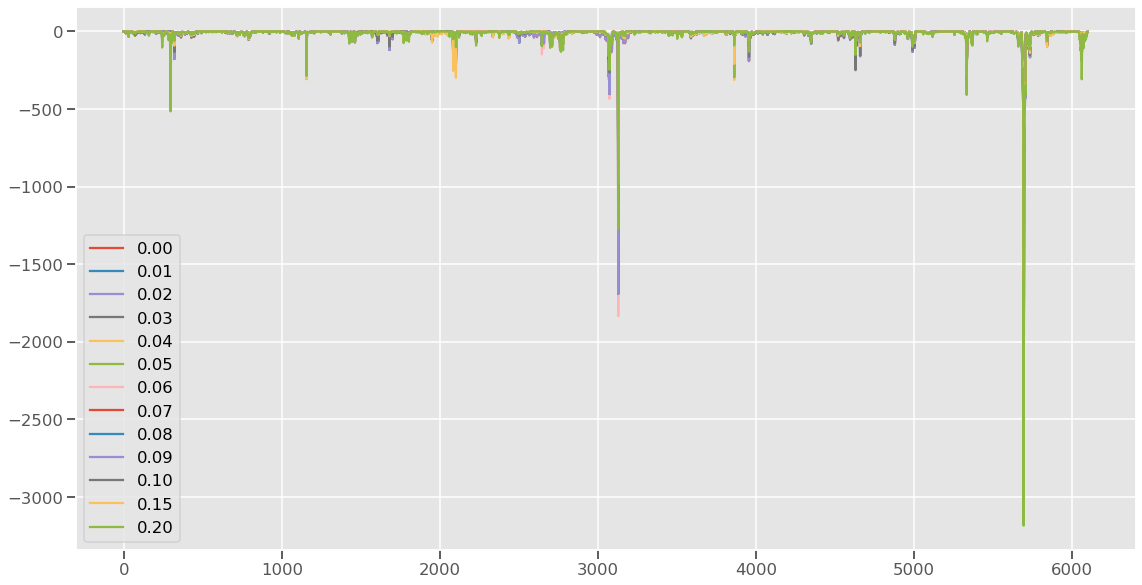

In [46]:
fig, ax = plt.subplots(1, 1, figsize=(19,10))
for mss, error in rolling_error.items():
    ax.plot(range(len(error)), error, label=mss)
ax.legend()
plt.show()

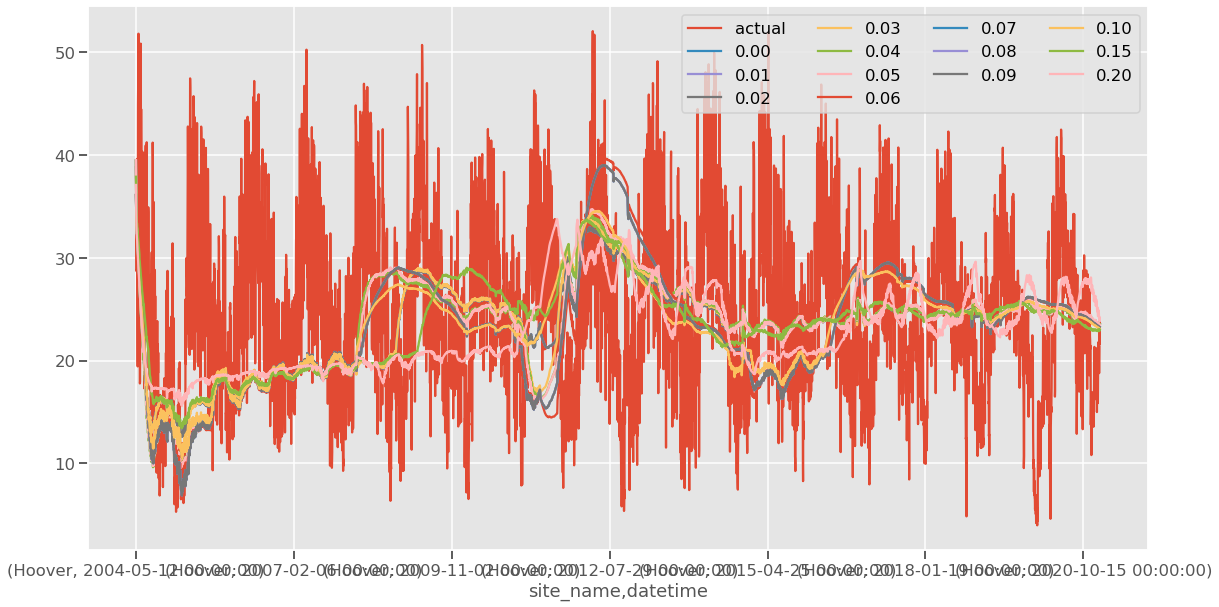

In [50]:
fig, ax = plt.subplots(1, 1, figsize=(19,10))
res["0.00"]["actual"].plot(ax=ax, label="actual")
for mss, df in res.items():
    df["model"].plot(ax=ax, label=mss)
ax.legend(ncol=4)
plt.show()